In [ ]:
#!pip install seaborn=0.12.2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

# Set up the seaborn style
sns.set(style="whitegrid")

metrics = ["rev_new_avg","rev_new_tot","clicks_new_avg",'clicks_new_tot'] #,'coldstart_rate'
exp = ['_all_treat', '_all_control', 
       '_ad_treat', '_ad_control', 
       '_user_treat', '_user_control', 
       '_t_t', '_c_c', '_t_c', '_c_t']

res = pd.read_csv(f"simulation_results_seed1.csv")
res.drop(index = 5, inplace = True)

for i in metrics:
    if i != 'coldstart_rate':
        res['increase_' + i + '_true'] = res.apply(lambda x: (x[i + '_all_treat'] - x[i + '_all_control'])/x[i + '_all_control'], axis = 1)
        res['increase_' + i + '_est_ad'] = res.apply(lambda x: (x[i + '_ad_treat'] - x[i + '_ad_control'])/x[i + '_ad_control'], axis = 1)
        res['increase_' + i + '_est_user'] = res.apply(lambda x: (x[i + '_user_treat'] - x[i + '_user_control'])/x[i + '_user_control'], axis = 1)
        res['increase_' + i + '_est_two'] = res.apply(lambda x: ((x[i + '_t_t'] - x[i + '_c_c']) 
                                                      - (x[i + '_t_c'] - x[i + '_c_c'])
                                                      - (x[i + '_c_t'] - x[i + '_c_c']))/x[i + '_c_c'],axis = 1)
    if i == 'coldstart_rate':
        res['increase_' + i + '_true'] = res.apply(lambda x: (x[i + '_all_treat'] - x[i + '_all_control']), axis = 1)
        res['increase_' + i + '_est_ad'] = res.apply(lambda x: (x[i + '_ad_treat'] - x[i + '_ad_control']), axis = 1)
        res['increase_' + i + '_est_user'] = res.apply(lambda x: (x[i + '_user_treat'] - x[i + '_user_control']), axis = 1)
        res['increase_' + i + '_est_two'] = res.apply(lambda x: ((x[i + '_t_t'] - x[i + '_c_c']) 
                                                      - (x[i + '_t_c'] - x[i + '_c_c'])
                                                      - (x[i + '_c_t'] - x[i + '_c_c'])),axis = 1)
for i in metrics:
    res['bias_' + i + '_true'] = res.apply(lambda x:     (x['increase_' + i + '_true'])/x['increase_' + i + '_true'] -1, axis = 1)
    res['bias_' + i + '_est_ad'] = res.apply(lambda x:  (x['increase_' + i + '_est_ad'])/x['increase_' + i + '_true'] -1, axis = 1)
    res['bias_' + i + '_est_user'] = res.apply(lambda x:(x['increase_' + i + '_est_user'])/x['increase_' + i + '_true'] -1, axis = 1)
    res['bias_' + i + '_est_two'] = res.apply(lambda x:  (x['increase_' + i + '_est_two'])/x['increase_' + i + '_true'] -1, axis = 1)

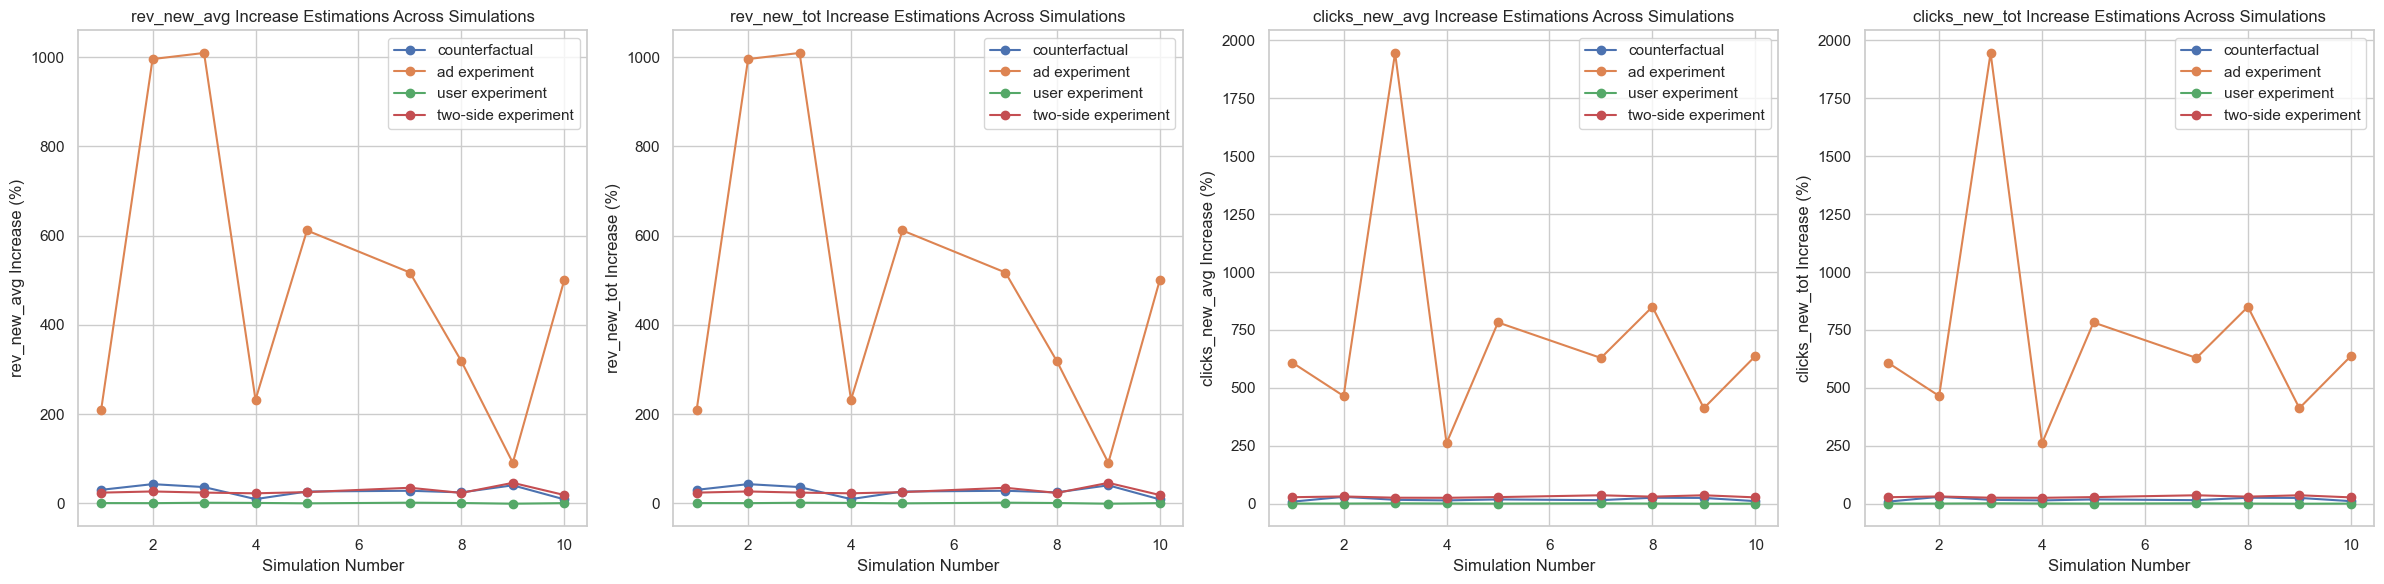

In [140]:
fig, ax = plt.subplots(1, len(metrics), figsize=(6*(len(metrics)), 6))
xtick_labels = ['counterfactual', 'ad experiment', 'user experiment', 'two-side experiment']

for idx, i in enumerate(metrics):
    # Create the line plot for average revenue increase estimations and true values in percentage
    ax[idx].plot(res.index + 1, res['increase_{}_true'.format(i)]* 100, label='True', marker='o')
    ax[idx].plot(res.index + 1, res['increase_{}_est_ad'.format(i)]* 100, label='Ad Exp', marker='o')
    ax[idx].plot(res.index + 1, res['increase_{}_est_user'.format(i)]* 100, label='User Exp', marker='o')
    ax[idx].plot(res.index + 1, res['increase_{}_est_two'.format(i)]* 100, label='Two Side Exp', marker='o')
    
    ax[idx].set_title('{} Increase Estimations Across Simulations'.format(i))
    ax[idx].set_xlabel('Simulation Number')
    ax[idx].set_ylabel('{} Increase (%)'.format(i))
    ax[idx].legend(xtick_labels)
    
plt.tight_layout()
plt.savefig('./pic/simulation_line.png')
plt.show()

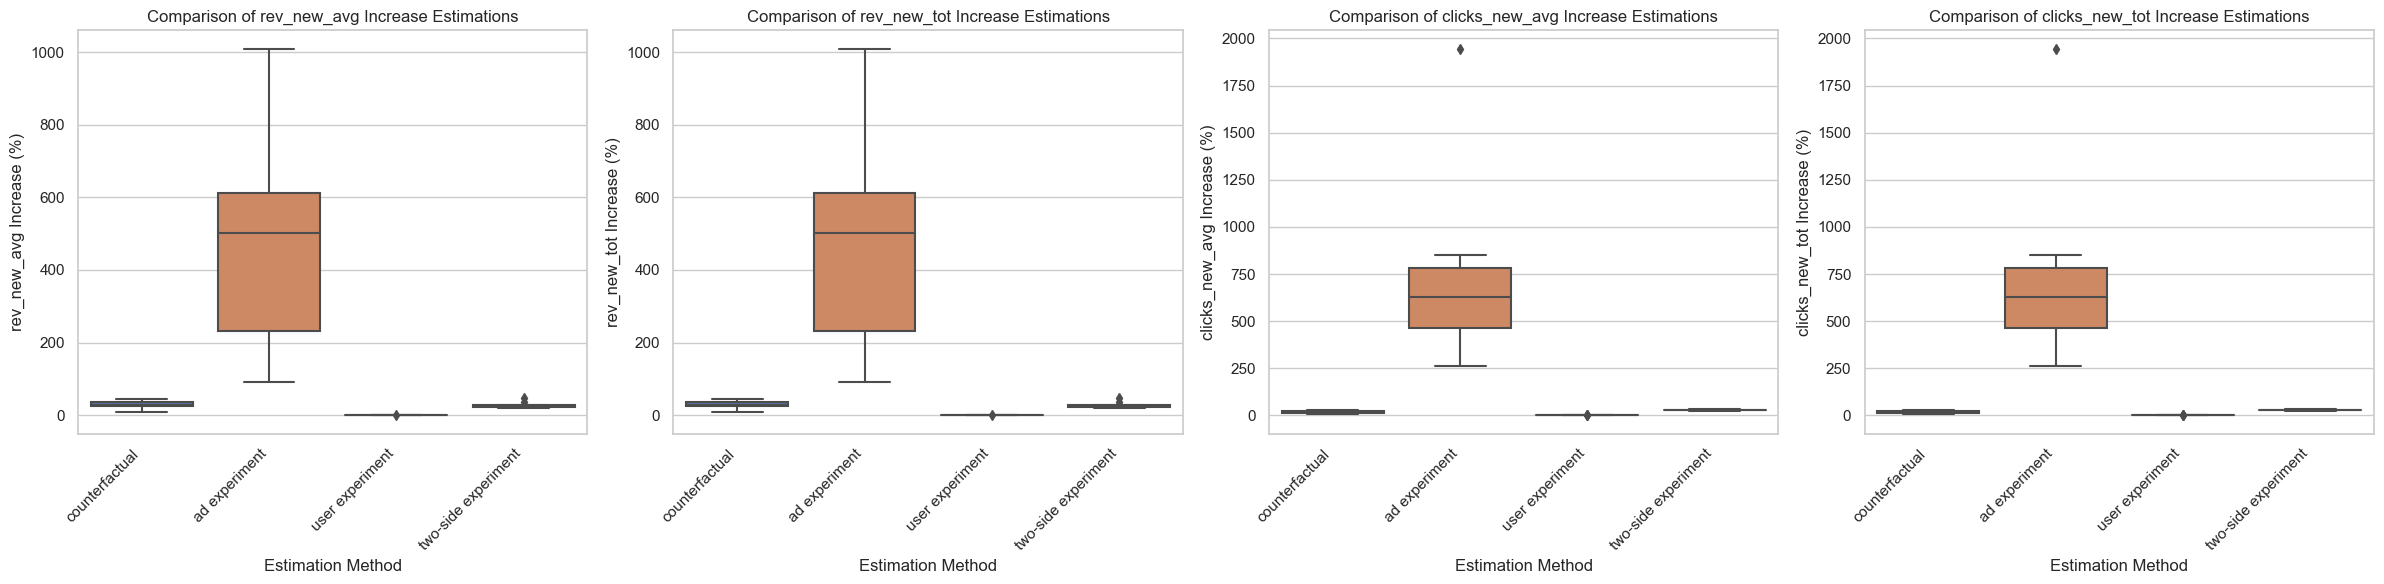

In [141]:
fig, ax = plt.subplots(1, len(metrics), figsize=(6*(len(metrics)), 6))
xtick_labels = ['counterfactual', 'ad experiment', 'user experiment', 'two-side experiment']

for idx, i in enumerate(metrics):
    # Create a combined DataFrame with all the columns for easier plotting and multiply by 100 for percentage
    plot_data = pd.melt(res, value_vars=['increase_{}_true'.format(i), 'increase_{}_est_ad'.format(i),
                                         'increase_{}_est_user'.format(i), 'increase_{}_est_two'.format(i)],
                        var_name='method', value_name='increase_{}'.format(i))
    plot_data['increase_{}'.format(i)] = plot_data['increase_{}'.format(i)] * 100

    # Create the box plot for average revenue increase
    sns.boxplot(x='method', y='increase_{}'.format(i), data=plot_data, ax=ax[idx])
    ax[idx].set_xticklabels(xtick_labels, rotation=45, ha='right')
    ax[idx].set_title('Comparison of {} Increase Estimations'.format(i))
    ax[idx].set_xlabel('Estimation Method')
    ax[idx].set_ylabel('{} Increase (%)'.format(i))
plt.tight_layout()
plt.savefig('./pic/simulation_box.png')
plt.show()

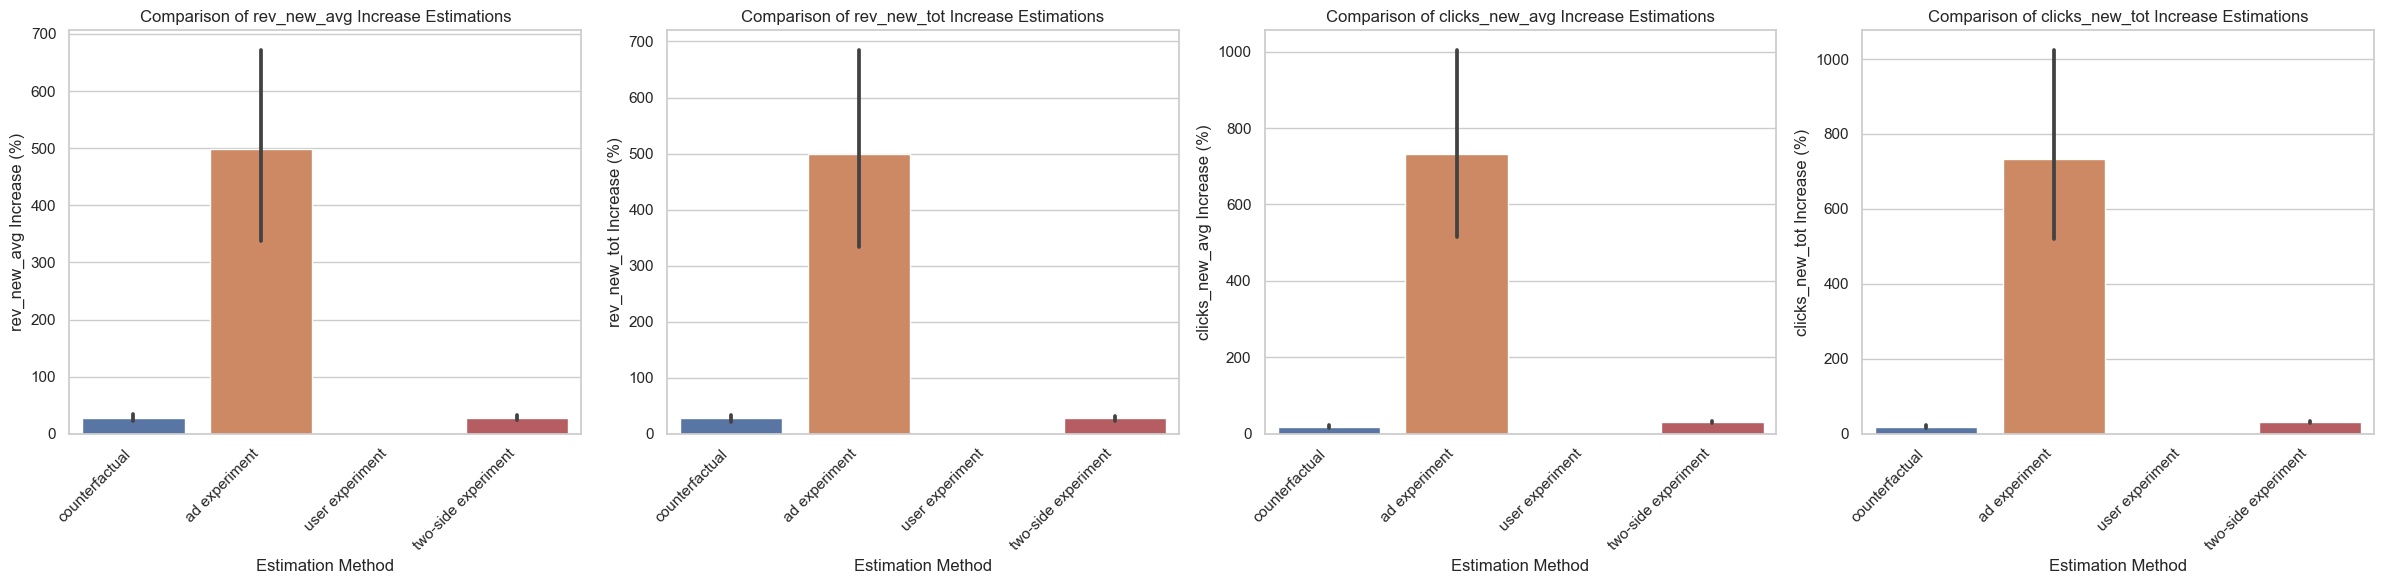

In [142]:
fig, ax = plt.subplots(1, len(metrics), figsize=(6*(len(metrics)), 6))
xtick_labels = ['counterfactual', 'ad experiment', 'user experiment', 'two-side experiment']

for idx, i in enumerate(metrics):
    # Create a combined DataFrame with all the columns for easier plotting and multiply by 100 for percentage
    plot_data = pd.melt(res, value_vars=['increase_{}_true'.format(i), 'increase_{}_est_ad'.format(i),
                                         'increase_{}_est_user'.format(i), 'increase_{}_est_two'.format(i)],
                        var_name='method', value_name='increase_{}'.format(i))
    plot_data['increase_{}'.format(i)] = plot_data['increase_{}'.format(i)] * 100

    # Create the bar plot with confidence interval for average revenue increase
    sns.barplot(x='method', y='increase_{}'.format(i), data=plot_data, ax=ax[idx], errorbar=('ci', 90))
    ax[idx].set_xticklabels(xtick_labels, rotation=45, ha='right')
    ax[idx].set_title('Comparison of {} Increase Estimations'.format(i))
    ax[idx].set_xlabel('Estimation Method')
    ax[idx].set_ylabel('{} Increase (%)'.format(i))
plt.tight_layout()
plt.savefig('./pic/simulation_bar.png')
plt.show()

In [15]:
# Replace 'metrics' with your actual metrics list
metrics = ["rev_new_avg","rev_new_tot","clicks_new_avg",'clicks_new_tot']

methods = ['true', 'est_ad', 'est_user', 'est_two']
confidence_level = 0.95

for metric in metrics:
    print(f"95% Confidence Intervals for {metric} Increase:")
    
    for method in methods:
        data = res[f'increase_{metric}_{method}'] * 100
        mean = np.mean(data)
        sem = st.sem(data)
        ci = st.t.interval(confidence_level, len(data)-1, loc=mean, scale=sem)
        
        method_name = method.replace("est_", "").replace("true", "counterfactual")
        
        print(method_name, ':', "%.2f"%(mean),'ci',ci )
    print("\n")

95% Confidence Intervals for rev_new_avg Increase:
counterfactual : 17.48 ci (9.695117346386274, 25.270772328531216)
ad : 142.67 ci (61.77036835063295, 223.56832541590455)
user : 0.44 ci (-0.02982239556048355, 0.9147429912362723)
two : 20.09 ci (15.655939700264337, 24.51812714584317)


95% Confidence Intervals for rev_new_tot Increase:
counterfactual : 17.48 ci (9.695117346386308, 25.27077232853109)
ad : 142.67 ci (61.77036835063261, 223.56832541590342)
user : 0.44 ci (-0.02982239556051769, 0.9147429912363113)
two : 20.09 ci (15.655939700264389, 24.518127145843124)


95% Confidence Intervals for clicks_new_avg Increase:
counterfactual : 13.66 ci (11.19862977239354, 16.128291390004776)
ad : 145.42 ci (99.01892426446256, 191.8237632815477)
user : 0.76 ci (0.4392192426425326, 1.078603229159372)
two : 20.63 ci (17.59951677220519, 23.66687580393768)


95% Confidence Intervals for clicks_new_tot Increase:
counterfactual : 13.66 ci (11.198629772370948, 16.12829139001022)
ad : 145.42 ci (99.01